In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta


## M60 EUR/USD 

In [4]:
def calculate_abs_max_move(df, window_hours=12):
    # Convert Date to numpy datetime64 for efficient computation
    dates = df['Date'].values
    closes = df['Close'].values
    n = len(df)
    
    # Precompute the end time for each row
    end_times = dates + np.timedelta64(window_hours, 'h')
    
    # Initialize an array to store the abs_max_move
    abs_max_move = np.full(n, np.nan)
    
    # Use numpy's searchsorted for efficient index searching
    # Ensure dates are sorted
    sorted_dates = dates
    for i in range(n):
        # Find the index of the first date greater than the current date
        start_idx = i + 1
        if start_idx >= n:
            break  # No future data points
        
        # Find the index where Date > end_time[i]
        end_idx = np.searchsorted(sorted_dates, end_times[i], side='right')
        
        # Slice the Close prices within the window
        future_closes = closes[start_idx:end_idx]
        
        if len(future_closes) == 0:
            abs_max_move[i] = np.nan  # No future data within window
            continue
        
        # Calculate percentage changes
        pct_changes = (future_closes - closes[i]) / closes[i] * 100
        
        # Find the maximum absolute percentage change
        max_abs_idx = np.argmax(np.abs(pct_changes))
        abs_max_move[i] = pct_changes[max_abs_idx]
    
    return abs_max_move



In [ ]:
# Load the data
df_eur = pd.read_csv('M60 FX Data/M60_eur_usd_combined.csv', parse_dates=['Date'])

# Sort by Date in ascending order
df_eur.sort_values('Date', inplace=True)
df_eur.reset_index(drop=True, inplace=True)

# Calculate the absolute maximum move
df_eur['max_move'] = calculate_abs_max_move(df_eur)


# Display the updated DataFrame
df_eur.head(20)


,Date,Open,High,Low,Close,Volume,max_move
0,2013-01-01 17:00:00,1.32041,1.32191,1.31997,1.32055,0,0.664874
1,2013-01-01 18:00:00,1.32056,1.32079,1.31879,1.31974,0,0.726658
2,2013-01-01 19:00:00,1.31973,1.32122,1.31916,1.32066,0,0.656490
3,2013-01-01 20:00:00,1.32065,1.32769,1.32063,1.32736,0,-0.218479
4,2013-01-01 21:00:00,1.32763,1.32987,1.32705,1.32933,0,-0.366350
5,2013-01-01 22:00:00,1.32932,1.32962,1.32747,1.32857,0,-0.353764
6,2013-01-01 23:00:00,1.32855,1.32890,1.32519,1.32601,0,-0.494717
7,2013-01-02 00:00:00,1.32603,1.32723,1.32554,1.32659,0,-0.737982
8,2013-01-02 01:00:00,1.32660,1.32761,1.32655,1.32712,0,-0.809271
9,2013-01-02 02:00:00,1.32710,1.32932,1.32685,1.32726,0,-0.819734


In [6]:
# Exclude NaN values to ensure accurate percentile calculation
max_move_values = df_eur['max_move'].dropna()

# Using NumPy
percentile_10 = np.percentile(max_move_values, 10)
percentile_90 = np.percentile(max_move_values, 90)

print(f"10th Percentile: {percentile_10:.3f}%")
print(f"90th Percentile: {percentile_90:.3f}%")



10th Percentile: -0.472%
90th Percentile: 0.463%


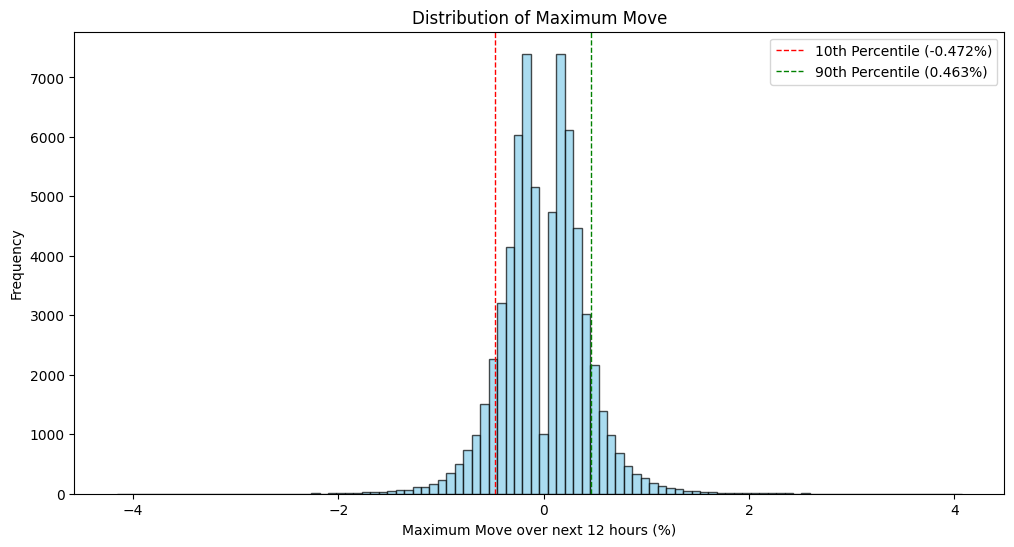

In [7]:
# Create a histogram of abs_max_move
plt.figure(figsize=(12, 6))
plt.hist(max_move_values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the 10th and 90th percentiles
plt.axvline(percentile_10, color='red', linestyle='dashed', linewidth=1, label=f'10th Percentile ({percentile_10:.3f}%)')
plt.axvline(percentile_90, color='green', linestyle='dashed', linewidth=1, label=f'90th Percentile ({percentile_90:.3f}%)')

# Add labels and title
plt.xlabel('Maximum Move over next 12 hours (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Move')

# Add a legend
plt.legend()

# Show the plot
plt.show()


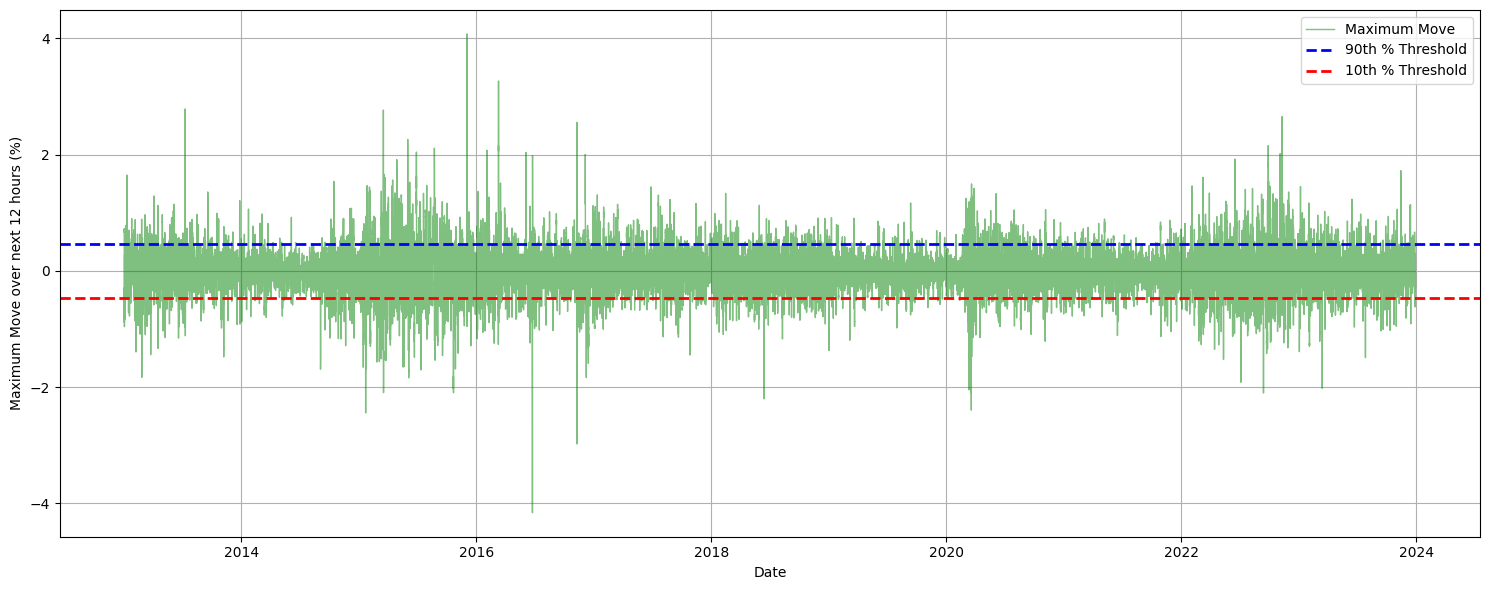

In [8]:
# Ensure 'Date' is in datetime format and sorted
df_eur['Date'] = pd.to_datetime(df_eur['Date'])
df_eur.sort_values('Date', inplace=True)

# Set 'Date' as the DataFrame index for easier plotting
df_eur.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the 'abs_max_move' time series
plt.plot(df_eur.index, df_eur['max_move'], color='green', alpha=0.5, linewidth=1, label='Maximum Move')

# Add horizontal red dashed lines at y = 0.463% and y = -0.472%
plt.axhline(y=0.463, color='blue', linestyle='--', linewidth=2, label='90th % Threshold')
plt.axhline(y=-0.472, color='red', linestyle='--', linewidth=2, label='10th % Threshold')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Maximum Move over next 12 hours (%)')

plt.grid(True)
plt.legend()  # Add a legend to differentiate between the lines
plt.tight_layout()

# Display the plot
plt.show()




In [8]:
# Define the conditions
conditions = [
    df_eur['max_move'] > 0.4633,   # Condition for Label 1
    df_eur['max_move'] < -0.472   # Condition for Label 2
]

# Define the corresponding labels
labels = [1, 2]

# Create the 'Label' column using np.select
df_eur['Label'] = np.select(conditions, labels, default=0)

# Display the first few rows to verify
df_eur.head()


,Open,High,Low,Close,Volume,max_move,Label
Date,,,,,,,
2013-01-01 17:00:00,1.32041,1.32191,1.31997,1.32055,0,0.664874,1
2013-01-01 18:00:00,1.32056,1.32079,1.31879,1.31974,0,0.726658,1
2013-01-01 19:00:00,1.31973,1.32122,1.31916,1.32066,0,0.656490,1
2013-01-01 20:00:00,1.32065,1.32769,1.32063,1.32736,0,-0.218479,0
2013-01-01 21:00:00,1.32763,1.32987,1.32705,1.32933,0,-0.366350,0


In [ ]:
# Saving the data frame
df_eur.to_csv('M60_eur_usd_labeled.csv', index=True)

In [9]:
def plot_label_counts_per_year(df_eur):
    """
    Counts the number of labels 1 and 2 combined for each year in the df_eur DataFrame
    and plots the counts as a bar chart.

    Parameters:
    df_eur (pd.DataFrame): DataFrame with a DateTime index and a 'label' column containing 0, 1, or 2.

    Returns:
    None
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df_eur.index, pd.DatetimeIndex):
        try:
            df_eur = df_eur.copy()
            df_eur.index = pd.to_datetime(df_eur.index)
        except Exception as e:
            raise ValueError("The DataFrame index must be convertible to DateTime.") from e

    # Filter rows where label is 1 or 2
    filtered_df = df_eur[df_eur['Label'].isin([1, 2])]

    # Extract the year from the index
    filtered_df = filtered_df.copy()
    filtered_df['year'] = filtered_df.index.year

    # Group by year and count the number of labels 1 and 2
    label_counts = filtered_df.groupby('year')['Label'].count()

    # Sort the counts by year for better visualization
    label_counts = label_counts.sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Number of Labels 1 and 2 per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Labels 1 and 2')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()


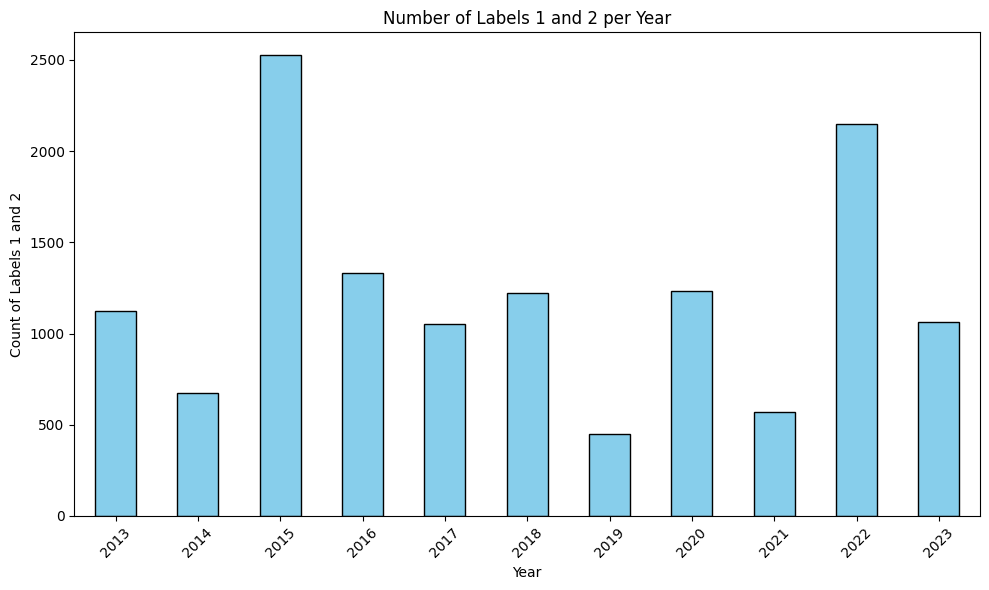

In [10]:
# Plot
plot_label_counts_per_year(df_eur)


# M60 GBP/USD

In [ ]:
# Load the data
df_gbp = pd.read_csv('M60 FX Data/M60_gbp_usd_combined.csv', parse_dates=['Date'])

# Sort by Date in ascending order
df_gbp.sort_values('Date', inplace=True)
df_gbp.reset_index(drop=True, inplace=True)

# Calculate the absolute maximum move
df_gbp['max_move'] = calculate_abs_max_move(df_gbp)


# Display the updated DataFrame
df_gbp.head(20)

,Date,Open,High,Low,Close,Volume,max_move
0,2013-01-01 17:00:00,1.62559,1.62604,1.62345,1.62544,0,0.612757
1,2013-01-01 18:00:00,1.62531,1.62560,1.62385,1.62437,0,0.679032
2,2013-01-01 19:00:00,1.62440,1.62696,1.62405,1.62555,0,0.605949
3,2013-01-01 20:00:00,1.62556,1.63036,1.62543,1.62924,0,0.378090
4,2013-01-01 21:00:00,1.62912,1.63803,1.62912,1.63540,0,-0.372386
5,2013-01-01 22:00:00,1.63544,1.63609,1.63311,1.63472,0,-0.390893
6,2013-01-01 23:00:00,1.63473,1.63483,1.63162,1.63180,0,-0.400172
7,2013-01-02 00:00:00,1.63181,1.63299,1.63104,1.63166,0,-0.532586
8,2013-01-02 01:00:00,1.63164,1.63324,1.63152,1.63204,0,-0.555746
9,2013-01-02 02:00:00,1.63202,1.63377,1.63096,1.63113,0,-0.500267


In [6]:
# Remove extreme outliars
df_gbp = df_gbp[df_gbp['max_move'] >= -3]


In [7]:
# Exclude NaN values to ensure accurate percentile calculation
max_move_values = df_gbp['max_move'].dropna()

# Using NumPy
percentile_10 = np.percentile(max_move_values, 10)
percentile_90 = np.percentile(max_move_values, 90)

print(f"10th Percentile: {percentile_10:.3f}%")
print(f"90th Percentile: {percentile_90:.3f}%")


10th Percentile: -0.530%
90th Percentile: 0.519%


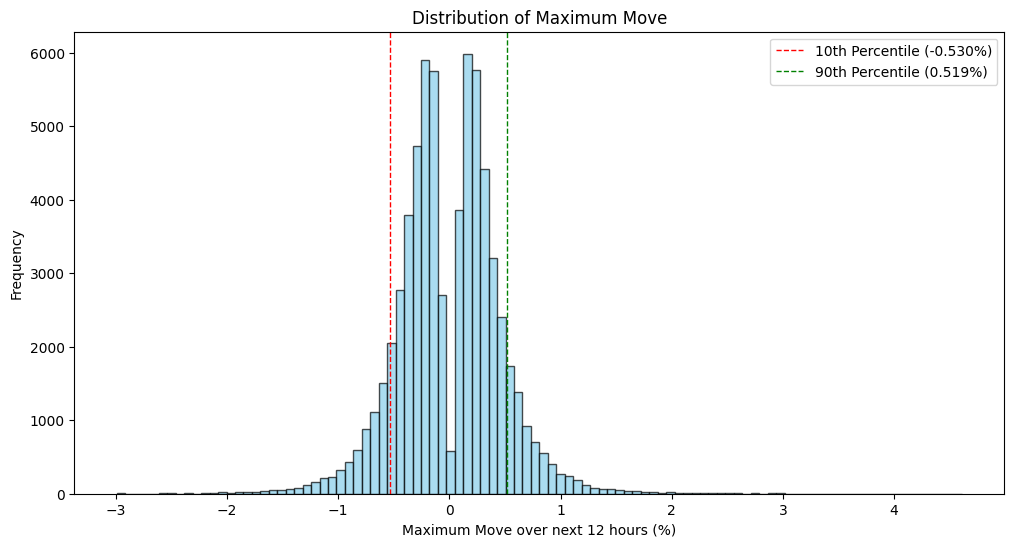

In [8]:
# Create a histogram of cum_max_move
plt.figure(figsize=(12, 6))
plt.hist(max_move_values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the 10th and 90th percentiles
plt.axvline(percentile_10, color='red', linestyle='dashed', linewidth=1, label=f'10th Percentile ({percentile_10:.3f}%)')
plt.axvline(percentile_90, color='green', linestyle='dashed', linewidth=1, label=f'90th Percentile ({percentile_90:.3f}%)')

# Add labels and title
plt.xlabel('Maximum Move over next 12 hours (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Move')

# Add a legend
plt.legend()

# Show the plot
plt.show()

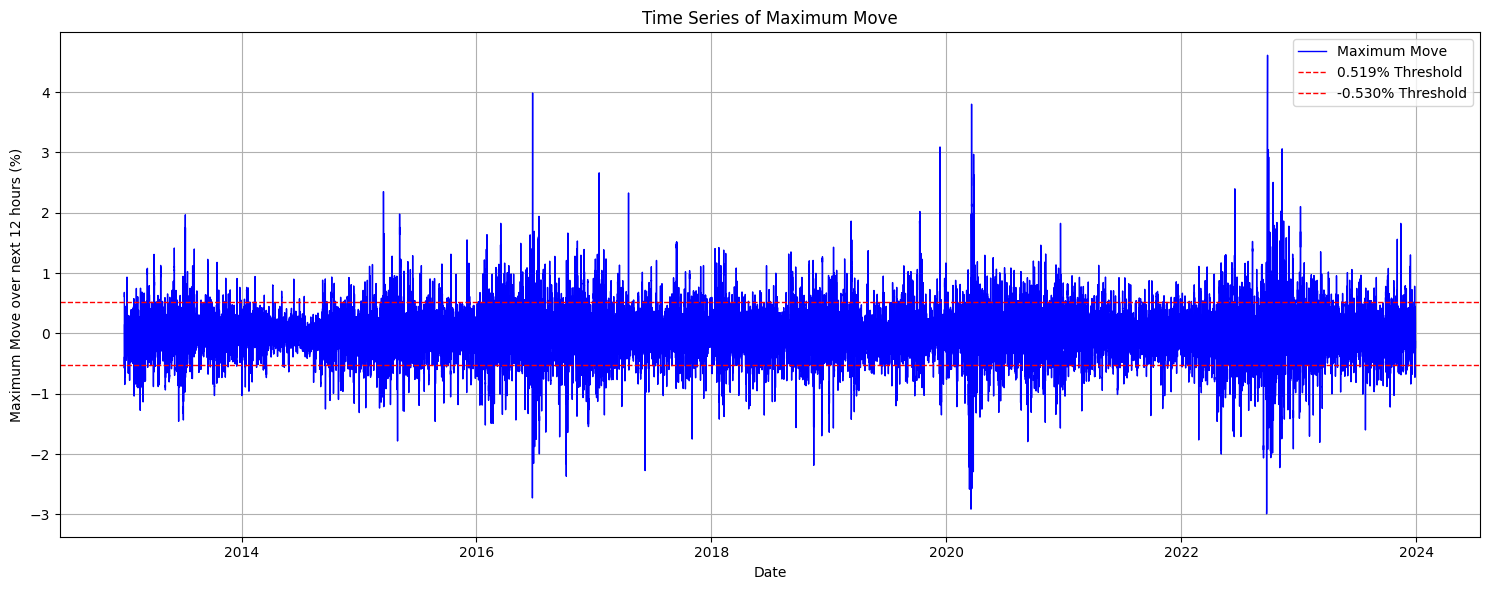

In [ ]:
# Ensure 'Date' is in datetime format and sorted
df_gbp['Date'] = pd.to_datetime(df_gbp['Date'])
df_gbp.sort_values('Date', inplace=True)

# Set 'Date' as the DataFrame index for easier plotting
df_gbp.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the 'abs_max_move' time series
plt.plot(df_gbp.index, df_gbp['max_move'], color='blue', linewidth=1, label='Maximum Move')

# Add horizontal red dashed lines at y = 0.463% and y = -0.472%
plt.axhline(y=0.519, color='red', linestyle='--', linewidth=1, label='0.519% Threshold')
plt.axhline(y=-0.530, color='red', linestyle='--', linewidth=1, label='-0.530% Threshold')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Maximum Move over next 12 hours (%)')
plt.title('Time Series of Maximum Move')
plt.grid(True)
plt.legend()  # Add a legend to differentiate between the lines
plt.tight_layout()

# Display the plot
plt.show()



In [10]:
# Define the conditions
conditions = [
    df_gbp['max_move'] > 0.519,   # Condition for Label 1
    df_gbp['max_move'] < -0.530   # Condition for Label 2
]

# Define the corresponding labels
labels = [1, 2]

# Create the 'Label' column using np.select
df_gbp['Label'] = np.select(conditions, labels, default=0)

# Display the first few rows to verify
df_gbp.head()

,Open,High,Low,Close,Volume,max_move,Label
Date,,,,,,,
2013-01-01 17:00:00,1.62559,1.62604,1.62345,1.62544,0,0.612757,1
2013-01-01 18:00:00,1.62531,1.62560,1.62385,1.62437,0,0.679032,1
2013-01-01 19:00:00,1.62440,1.62696,1.62405,1.62555,0,0.605949,1
2013-01-01 20:00:00,1.62556,1.63036,1.62543,1.62924,0,0.378090,0
2013-01-01 21:00:00,1.62912,1.63803,1.62912,1.63540,0,-0.372386,0


In [28]:
# Saving the data frame
df_gbp.to_csv('M60_gbp_usd_avg12H_labeled.csv', index=True)

In [11]:
def plot_label_counts_per_year(df_gbp):
    """
    Counts the number of labels 1 and 2 combined for each year in the df_gbp DataFrame
    and plots the counts as a bar chart.

    Parameters:
    df_gbp (pd.DataFrame): DataFrame with a DateTime index and a 'label' column containing 0, 1, or 2.

    Returns:
    None
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df_gbp.index, pd.DatetimeIndex):
        try:
            df_gbp = df_gbp.copy()
            df_gbp.index = pd.to_datetime(df_gbp.index)
        except Exception as e:
            raise ValueError("The DataFrame index must be convertible to DateTime.") from e

    # Filter rows where label is 1 or 2
    filtered_df = df_gbp[df_gbp['Label'].isin([1, 2])]

    # Extract the year from the index
    filtered_df = filtered_df.copy()
    filtered_df['year'] = filtered_df.index.year

    # Group by year and count the number of labels 1 and 2
    label_counts = filtered_df.groupby('year')['Label'].count()

    # Sort the counts by year for better visualization
    label_counts = label_counts.sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Number of Labels 1 and 2 per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Labels 1 and 2')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

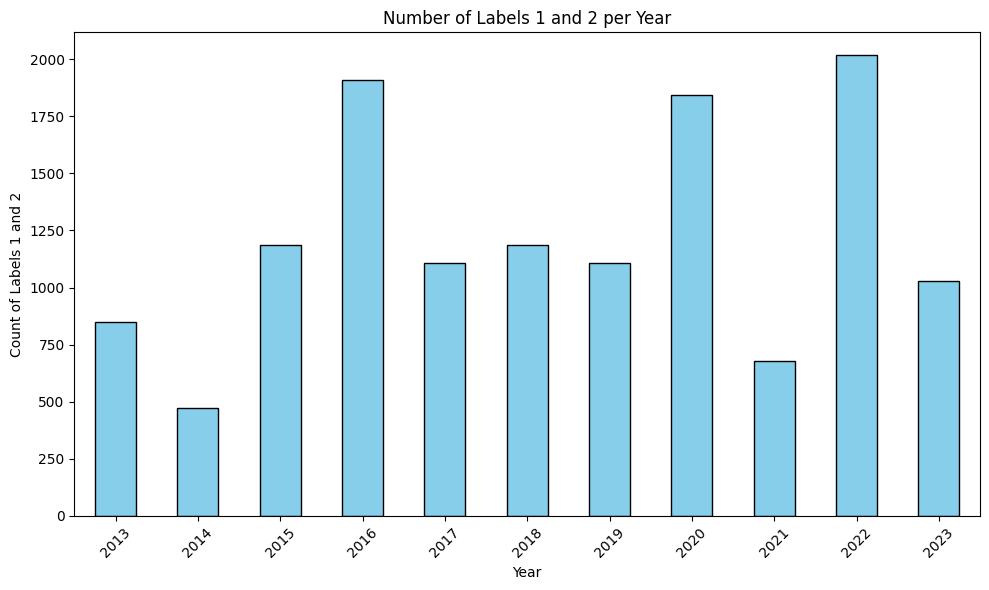

In [12]:
# Plot
plot_label_counts_per_year(df_gbp)

# M60 USD/CHF

In [ ]:
# Load the data
df_chf = pd.read_csv('M60 FX Data/M60_usd_chf_combined.csv', parse_dates=['Date'])

# Sort by Date in ascending order
df_chf.sort_values('Date', inplace=True)
df_chf.reset_index(drop=True, inplace=True)

# Calculate the absolute maximum move
df_chf['max_move'] = calculate_abs_max_move(df_chf)


# Display the updated DataFrame
df_chf.head(20)

,Date,Open,High,Low,Close,Volume,max_move
0,2013-01-01 17:00:00,0.91486,0.91522,0.91389,0.91467,0,-0.689866
1,2013-01-01 18:00:00,0.91480,0.91590,0.91427,0.91534,0,-0.762558
2,2013-01-01 19:00:00,0.91535,0.91539,0.91412,0.91451,0,-0.672491
3,2013-01-01 20:00:00,0.91450,0.91453,0.90901,0.90981,0,0.282477
4,2013-01-01 21:00:00,0.90966,0.90981,0.90770,0.90836,0,0.442556
5,2013-01-01 22:00:00,0.90835,0.90960,0.90820,0.90885,0,0.529240
6,2013-01-01 23:00:00,0.90886,0.91159,0.90858,0.91116,0,0.580579
7,2013-01-02 00:00:00,0.91117,0.91143,0.91015,0.91059,0,0.871962
8,2013-01-02 01:00:00,0.91057,0.91076,0.91016,0.91044,0,0.939106
9,2013-01-02 02:00:00,0.91048,0.91069,0.90903,0.91047,0,0.935780


In [14]:
# Remove extreme outliars
df_chf = df_chf[df_chf['max_move'] >= -3]

In [15]:
# Exclude NaN values to ensure accurate percentile calculation
max_move_values = df_chf['max_move'].dropna()

# Using NumPy
percentile_10 = np.percentile(max_move_values, 10)
percentile_90 = np.percentile(max_move_values, 90)

print(f"10th Percentile: {percentile_10:.3f}%")
print(f"90th Percentile: {percentile_90:.3f}%")


10th Percentile: -0.476%
90th Percentile: 0.471%


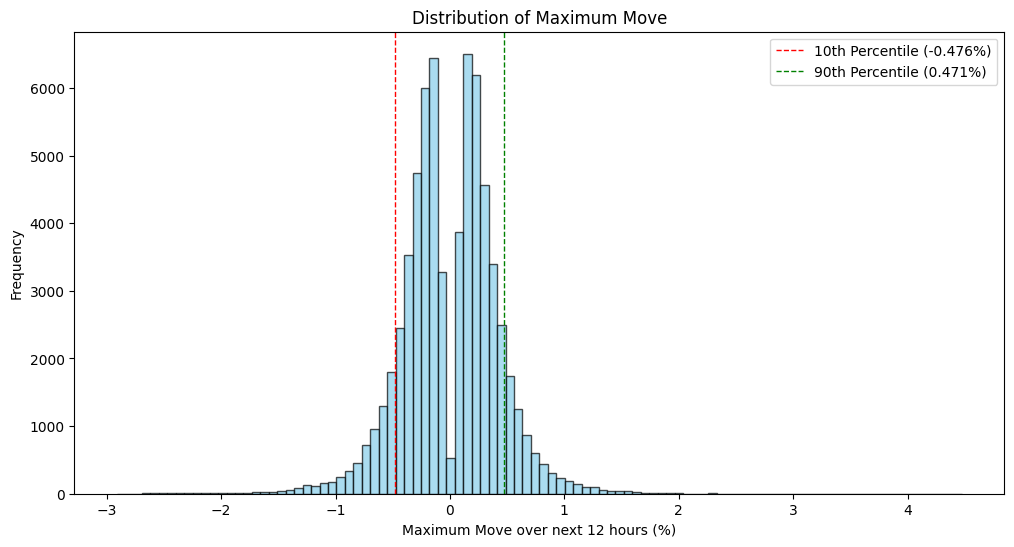

In [16]:
# Create a histogram of cum_max_move
plt.figure(figsize=(12, 6))
plt.hist(max_move_values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the 10th and 90th percentiles
plt.axvline(percentile_10, color='red', linestyle='dashed', linewidth=1, label=f'10th Percentile ({percentile_10:.3f}%)')
plt.axvline(percentile_90, color='green', linestyle='dashed', linewidth=1, label=f'90th Percentile ({percentile_90:.3f}%)')

# Add labels and title
plt.xlabel('Maximum Move over next 12 hours (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Move')

# Add a legend
plt.legend()

# Show the plot
plt.show()

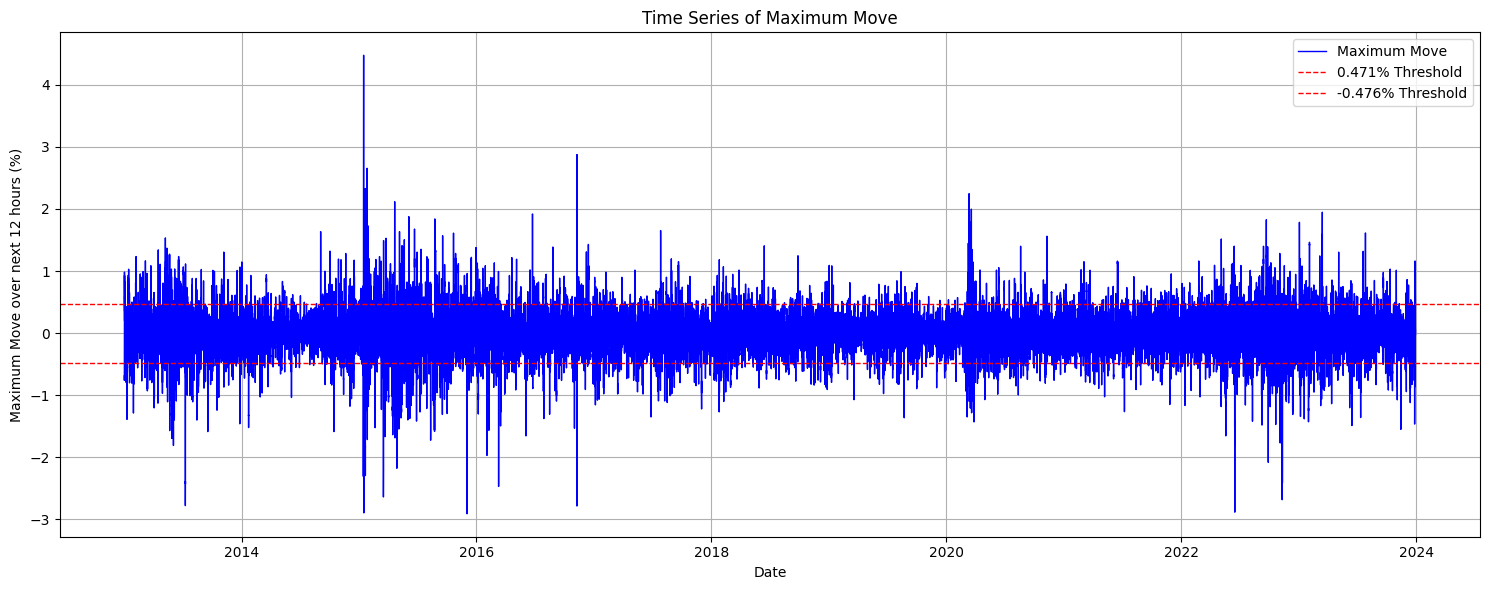

In [ ]:
# Ensure 'Date' is in datetime format and sorted
df_chf['Date'] = pd.to_datetime(df_chf['Date'])
df_chf.sort_values('Date', inplace=True)

# Set 'Date' as the DataFrame index for easier plotting
df_chf.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the 'abs_max_move' time series
plt.plot(df_chf.index, df_chf['max_move'], color='blue', linewidth=1, label='Maximum Move')

# Add horizontal red dashed lines at y = 0.463% and y = -0.472%
plt.axhline(y=0.471, color='red', linestyle='--', linewidth=1, label='0.471% Threshold')
plt.axhline(y=-0.476, color='red', linestyle='--', linewidth=1, label='-0.476% Threshold')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Maximum Move over next 12 hours (%)')
plt.title('Time Series of Maximum Move')
plt.grid(True)
plt.legend()  # Add a legend to differentiate between the lines
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
# Define the conditions
conditions = [
    df_chf['max_move'] > 0.471,   # Condition for Label 1
    df_chf['max_move'] < -0.476   # Condition for Label 2
]

# Define the corresponding labels
labels = [1, 2]

# Create the 'Label' column using np.select
df_chf['Label'] = np.select(conditions, labels, default=0)

# Display the first few rows to verify
df_chf.head()

,Open,High,Low,Close,Volume,max_move,Label
Date,,,,,,,
2013-01-01 17:00:00,0.91486,0.91522,0.91389,0.91467,0,-0.689866,2
2013-01-01 18:00:00,0.91480,0.91590,0.91427,0.91534,0,-0.762558,2
2013-01-01 19:00:00,0.91535,0.91539,0.91412,0.91451,0,-0.672491,2
2013-01-01 20:00:00,0.91450,0.91453,0.90901,0.90981,0,0.282477,0
2013-01-01 21:00:00,0.90966,0.90981,0.90770,0.90836,0,0.442556,0


In [42]:
# Saving the data frame
df_chf.to_csv('M60_usd_chf_avg12H_labeled.csv', index=True)

In [19]:
def plot_label_counts_per_year(df_chf):
    """
    Counts the number of labels 1 and 2 combined for each year in the df_chf DataFrame
    and plots the counts as a bar chart.

    Parameters:
    df_chf (pd.DataFrame): DataFrame with a DateTime index and a 'label' column containing 0, 1, or 2.

    Returns:
    None
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df_chf.index, pd.DatetimeIndex):
        try:
            df_chf = df_chf.copy()
            df_chf.index = pd.to_datetime(df_chf.index)
        except Exception as e:
            raise ValueError("The DataFrame index must be convertible to DateTime.") from e

    # Filter rows where label is 1 or 2
    filtered_df = df_chf[df_chf['Label'].isin([1, 2])]

    # Extract the year from the index
    filtered_df = filtered_df.copy()
    filtered_df['year'] = filtered_df.index.year

    # Group by year and count the number of labels 1 and 2
    label_counts = filtered_df.groupby('year')['Label'].count()

    # Sort the counts by year for better visualization
    label_counts = label_counts.sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Number of Labels 1 and 2 per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Labels 1 and 2')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

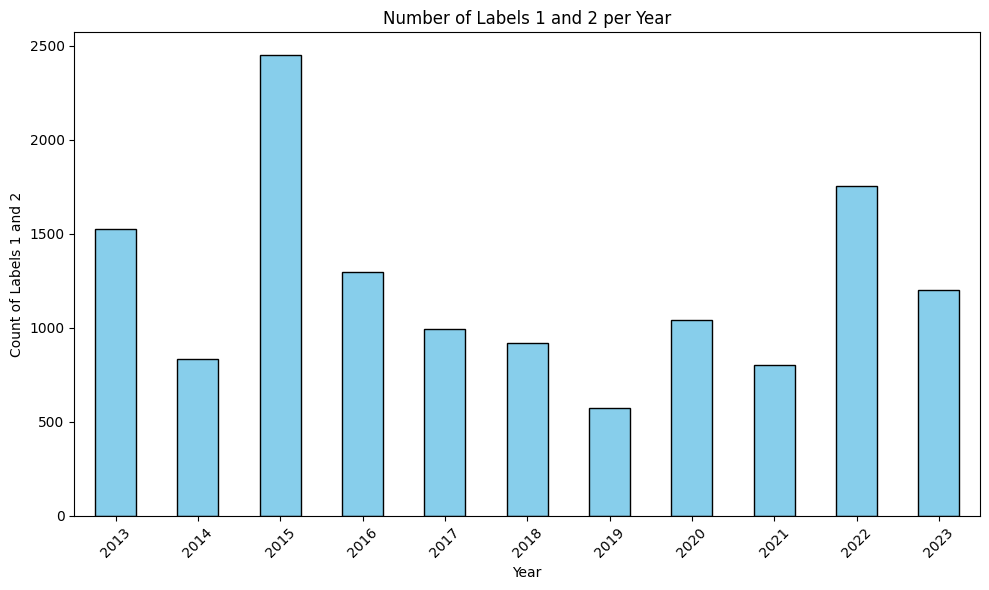

In [20]:
# Plot
plot_label_counts_per_year(df_chf)

# M60 USD/JPY

In [ ]:
# Load the data
df_jpy = pd.read_csv('M60 FX Data/M60_usd_jpy_combined.csv', parse_dates=['Date'])

# Sort by Date in ascending order
df_jpy.sort_values('Date', inplace=True)
df_jpy.reset_index(drop=True, inplace=True)

# Calculate the absolute maximum move
df_jpy['max_move'] = calculate_abs_max_move(df_jpy)


# Display the updated DataFrame
df_jpy.head(20)

,Date,Open,High,Low,Close,Volume,max_move
0,2013-01-01 17:00:00,86.680,86.839,86.680,86.764,0,0.541699
1,2013-01-01 18:00:00,86.763,86.763,86.578,86.606,0,0.725123
2,2013-01-01 19:00:00,86.607,86.757,86.532,86.748,0,0.560243
3,2013-01-01 20:00:00,86.749,86.957,86.748,86.923,0,0.357788
4,2013-01-01 21:00:00,86.922,87.174,86.840,87.147,0,-0.157206
5,2013-01-01 22:00:00,87.146,87.290,87.048,87.227,0,-0.248776
6,2013-01-01 23:00:00,87.231,87.272,86.973,87.125,0,-0.131994
7,2013-01-02 00:00:00,87.127,87.211,87.084,87.172,0,-0.185839
8,2013-01-02 01:00:00,87.171,87.318,87.163,87.234,0,-0.256781
9,2013-01-02 02:00:00,87.233,87.259,87.136,87.209,0,-0.228187


In [22]:
# Exclude NaN values to ensure accurate percentile calculation
max_move_values = df_jpy['max_move'].dropna()

# Using NumPy
percentile_10 = np.percentile(max_move_values, 10)
percentile_90 = np.percentile(max_move_values, 90)

print(f"10th Percentile: {percentile_10:.3f}%")
print(f"90th Percentile: {percentile_90:.3f}%")

10th Percentile: -0.511%
90th Percentile: 0.497%


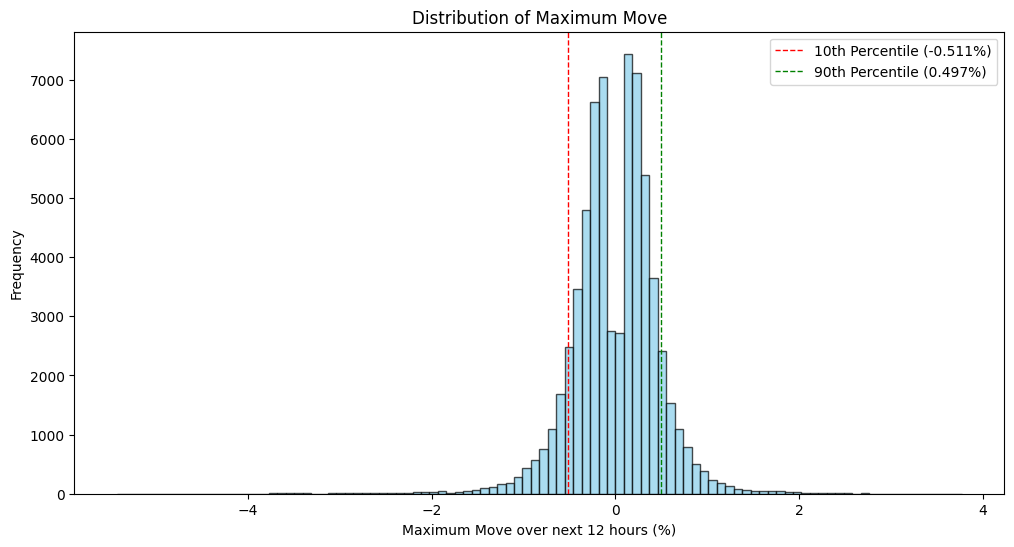

In [23]:
# Create a histogram of cum_max_move
plt.figure(figsize=(12, 6))
plt.hist(max_move_values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the 10th and 90th percentiles
plt.axvline(percentile_10, color='red', linestyle='dashed', linewidth=1, label=f'10th Percentile ({percentile_10:.3f}%)')
plt.axvline(percentile_90, color='green', linestyle='dashed', linewidth=1, label=f'90th Percentile ({percentile_90:.3f}%)')

# Add labels and title
plt.xlabel('Maximum Move over next 12 hours (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Move')

# Add a legend
plt.legend()

# Show the plot
plt.show()

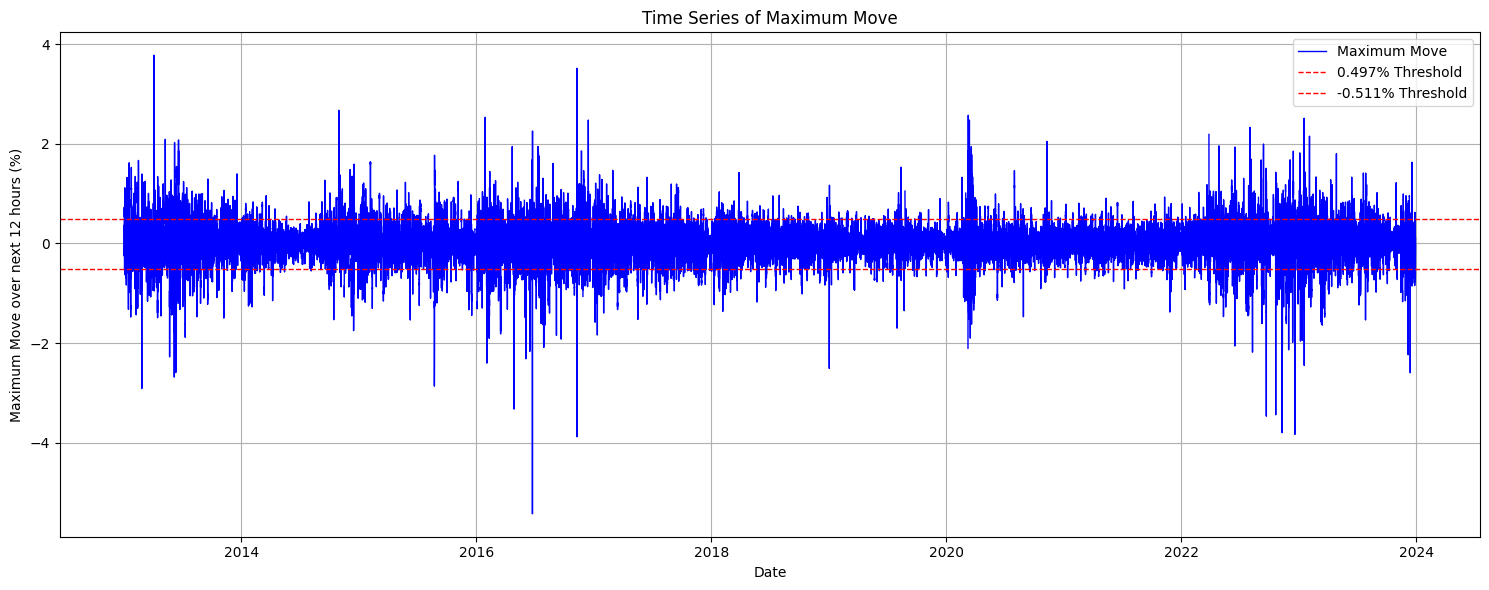

In [ ]:
# Ensure 'Date' is in datetime format and sorted
df_jpy['Date'] = pd.to_datetime(df_jpy['Date'])
df_jpy.sort_values('Date', inplace=True)

# Set 'Date' as the DataFrame index for easier plotting
df_jpy.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the 'abs_max_move' time series
plt.plot(df_jpy.index, df_jpy['max_move'], color='blue', linewidth=1, label= 'Maximum Move')

# Add horizontal red dashed lines at y = 0.463% and y = -0.472%
plt.axhline(y=0.497, color='red', linestyle='--', linewidth=1, label='0.497% Threshold')
plt.axhline(y=-0.511, color='red', linestyle='--', linewidth=1, label='-0.511% Threshold')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Maximum Move over next 12 hours (%)')
plt.title('Time Series of Maximum Move')
plt.grid(True)
plt.legend()  # Add a legend to differentiate between the lines
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
# Define the conditions
conditions = [
    df_jpy['max_move'] > 0.497,   # Condition for Label 1
    df_jpy['max_move'] < -0.511   # Condition for Label 2
]

# Define the corresponding labels
labels = [1, 2]

# Create the 'Label' column using np.select
df_jpy['Label'] = np.select(conditions, labels, default=0)

# Display the first few rows to verify
df_jpy.head()

,Open,High,Low,Close,Volume,max_move,Label
Date,,,,,,,
2013-01-01 17:00:00,86.680,86.839,86.680,86.764,0,0.541699,1
2013-01-01 18:00:00,86.763,86.763,86.578,86.606,0,0.725123,1
2013-01-01 19:00:00,86.607,86.757,86.532,86.748,0,0.560243,1
2013-01-01 20:00:00,86.749,86.957,86.748,86.923,0,0.357788,0
2013-01-01 21:00:00,86.922,87.174,86.840,87.147,0,-0.157206,0


In [50]:
# Saving the data frame
df_jpy.to_csv('M60_usd_jpy_avg12H_labeled.csv', index=True)

In [27]:
def plot_label_counts_per_year(df_jpy):
    """
    Counts the number of labels 1 and 2 combined for each year in the df_jpy DataFrame
    and plots the counts as a bar chart.

    Parameters:
    df_chf (pd.DataFrame): DataFrame with a DateTime index and a 'label' column containing 0, 1, or 2.

    Returns:
    None
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df_jpy.index, pd.DatetimeIndex):
        try:
            df_jpy = df_jpy.copy()
            df_jpy.index = pd.to_datetime(df_jpy.index)
        except Exception as e:
            raise ValueError("The DataFrame index must be convertible to DateTime.") from e

    # Filter rows where label is 1 or 2
    filtered_df = df_jpy[df_jpy['Label'].isin([1, 2])]

    # Extract the year from the index
    filtered_df = filtered_df.copy()
    filtered_df['year'] = filtered_df.index.year

    # Group by year and count the number of labels 1 and 2
    label_counts = filtered_df.groupby('year')['Label'].count()

    # Sort the counts by year for better visualization
    label_counts = label_counts.sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Number of Labels 1 and 2 per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Labels 1 and 2')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

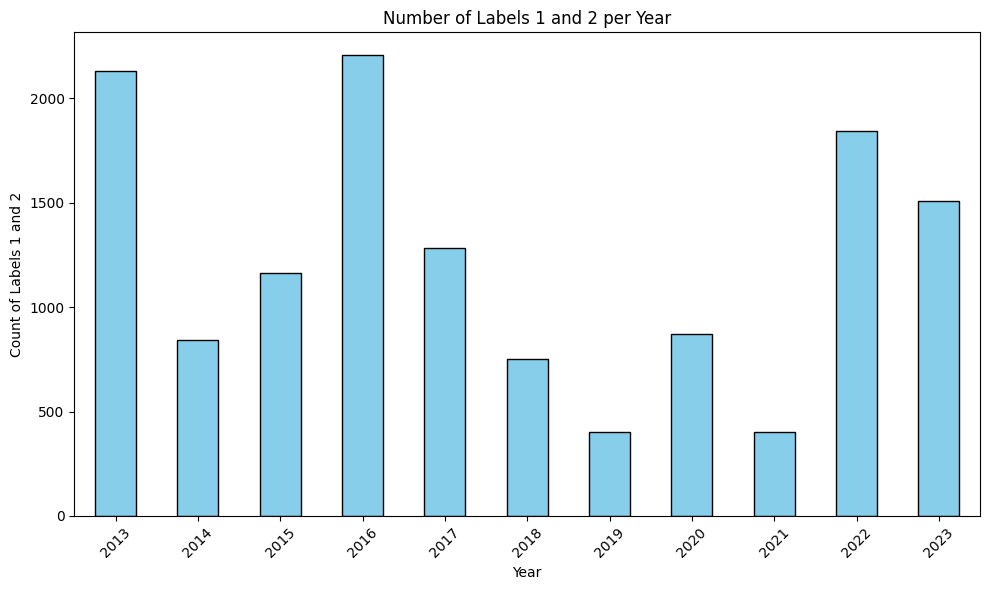

In [28]:
# Plot
plot_label_counts_per_year(df_jpy)

## M60 AUD/USD

In [ ]:
# Load the data
df_aud = pd.read_csv('M60 FX Data/M60_aud_usd_combined.csv', parse_dates=['Date'])

# Sort by Date in ascending order
df_aud.sort_values('Date', inplace=True)
df_aud.reset_index(drop=True, inplace=True)

# Calculate the absolute maximum move
df_aud['max_move'] = calculate_abs_max_move(df_aud)


# Display the updated DataFrame
df_aud.head(20)

,Date,Open,High,Low,Close,Volume,max_move
0,2013-01-01 17:00:00,1.03945,1.04021,1.03781,1.03781,0,1.086904
1,2013-01-01 18:00:00,1.03782,1.03974,1.03742,1.03903,0,0.968211
2,2013-01-01 19:00:00,1.03904,1.04201,1.03875,1.04119,0,0.758747
3,2013-01-01 20:00:00,1.04120,1.04635,1.04110,1.04555,0,0.452393
4,2013-01-01 21:00:00,1.04552,1.04923,1.04552,1.04865,0,0.271778
5,2013-01-01 22:00:00,1.04866,1.04871,1.04694,1.04801,0,0.333012
6,2013-01-01 23:00:00,1.04775,1.04800,1.04604,1.04668,0,0.460504
7,2013-01-02 00:00:00,1.04667,1.04749,1.04602,1.04733,0,0.398155
8,2013-01-02 01:00:00,1.04734,1.04831,1.04656,1.04778,0,0.355036
9,2013-01-02 02:00:00,1.04777,1.04872,1.04700,1.04737,0,0.394321


In [30]:
# Exclude NaN values to ensure accurate percentile calculation
max_move_values = df_aud['max_move'].dropna()

# Using NumPy
percentile_10 = np.percentile(max_move_values, 10)
percentile_90 = np.percentile(max_move_values, 90)

print(f"10th Percentile: {percentile_10:.3f}%")
print(f"90th Percentile: {percentile_90:.3f}%")

10th Percentile: -0.639%
90th Percentile: 0.611%


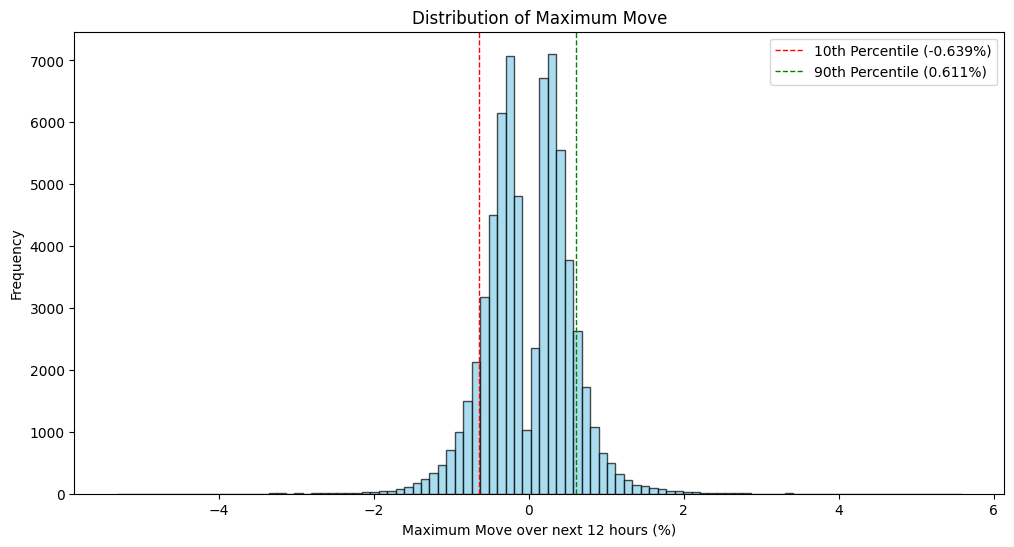

In [31]:
# Create a histogram of cum_max_move
plt.figure(figsize=(12, 6))
plt.hist(max_move_values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the 10th and 90th percentiles
plt.axvline(percentile_10, color='red', linestyle='dashed', linewidth=1, label=f'10th Percentile ({percentile_10:.3f}%)')
plt.axvline(percentile_90, color='green', linestyle='dashed', linewidth=1, label=f'90th Percentile ({percentile_90:.3f}%)')

# Add labels and title
plt.xlabel('Maximum Move over next 12 hours (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Move')

# Add a legend
plt.legend()

# Show the plot
plt.show()

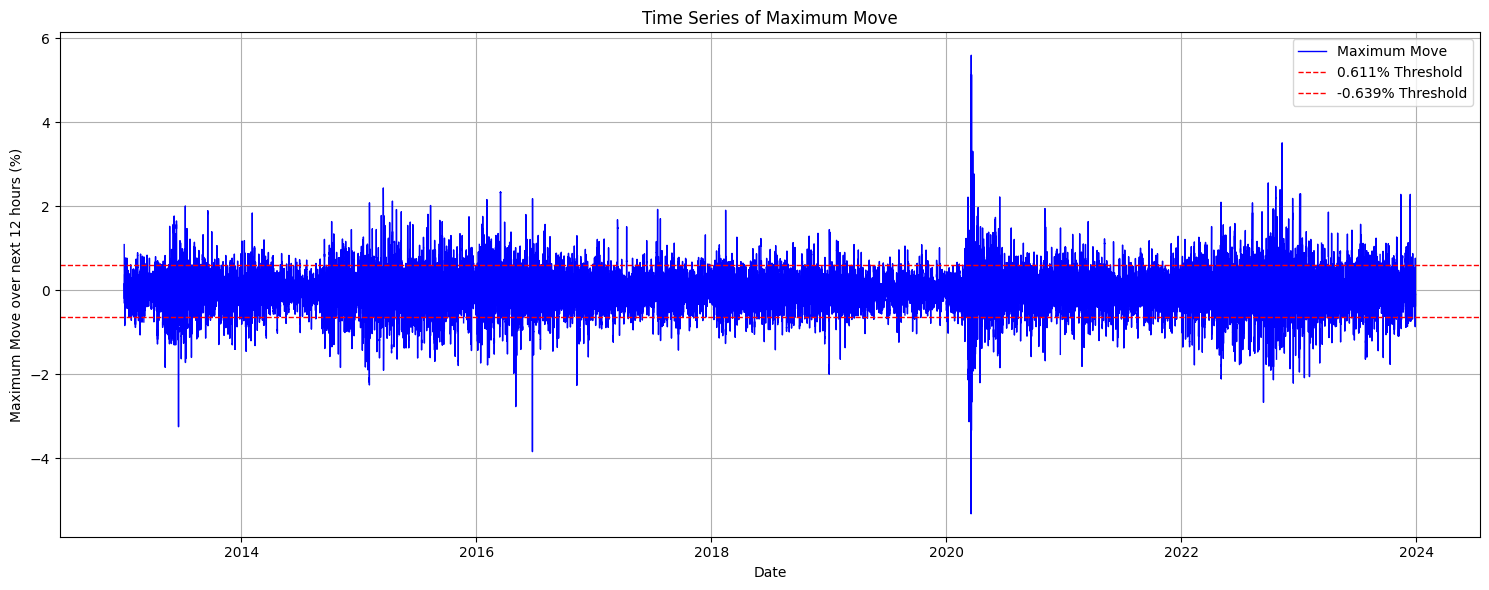

In [32]:
# Ensure 'Date' is in datetime format and sorted
df_aud['Date'] = pd.to_datetime(df_aud['Date'])
df_aud.sort_values('Date', inplace=True)

# Set 'Date' as the DataFrame index for easier plotting
df_aud.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the 'cum_max_move' time series
plt.plot(df_aud.index, df_aud['max_move'], color='blue', linewidth=1, label='Maximum Move')

# Add horizontal red dashed lines at y = 0.463% and y = -0.472%
plt.axhline(y=0.611, color='red', linestyle='--', linewidth=1, label='0.611% Threshold')
plt.axhline(y=-0.639, color='red', linestyle='--', linewidth=1, label='-0.639% Threshold')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Maximum Move over next 12 hours (%)')
plt.title('Time Series of Maximum Move')
plt.grid(True)
plt.legend()  # Add a legend to differentiate between the lines
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
# Define the conditions
conditions = [
    df_aud['max_move'] > 0.611,   # Condition for Label 1
    df_aud['max_move'] < -0.639   # Condition for Label 2
]

# Define the corresponding labels
labels = [1, 2]

# Create the 'Label' column using np.select
df_aud['Label'] = np.select(conditions, labels, default=0)

# Display the first few rows to verify
df_aud.head()

,Open,High,Low,Close,Volume,max_move,Label
Date,,,,,,,
2013-01-01 17:00:00,1.03945,1.04021,1.03781,1.03781,0,1.086904,1
2013-01-01 18:00:00,1.03782,1.03974,1.03742,1.03903,0,0.968211,1
2013-01-01 19:00:00,1.03904,1.04201,1.03875,1.04119,0,0.758747,1
2013-01-01 20:00:00,1.04120,1.04635,1.04110,1.04555,0,0.452393,0
2013-01-01 21:00:00,1.04552,1.04923,1.04552,1.04865,0,0.271778,0


In [58]:
# Saving the data frame
df_aud.to_csv('M60_aud_usd_avg12H_labeled.csv', index=True)

In [34]:
def plot_label_counts_per_year(df_aud):
    """
    Counts the number of labels 1 and 2 combined for each year in the df_aud DataFrame
    and plots the counts as a bar chart.

    Parameters:
    df_aud (pd.DataFrame): DataFrame with a DateTime index and a 'label' column containing 0, 1, or 2.

    Returns:
    None
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df_aud.index, pd.DatetimeIndex):
        try:
            df_aud = df_aud.copy()
            df_aud.index = pd.to_datetime(df_aud.index)
        except Exception as e:
            raise ValueError("The DataFrame index must be convertible to DateTime.") from e

    # Filter rows where label is 1 or 2
    filtered_df = df_aud[df_aud['Label'].isin([1, 2])]

    # Extract the year from the index
    filtered_df = filtered_df.copy()
    filtered_df['year'] = filtered_df.index.year

    # Group by year and count the number of labels 1 and 2
    label_counts = filtered_df.groupby('year')['Label'].count()

    # Sort the counts by year for better visualization
    label_counts = label_counts.sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Number of Labels 1 and 2 per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Labels 1 and 2')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

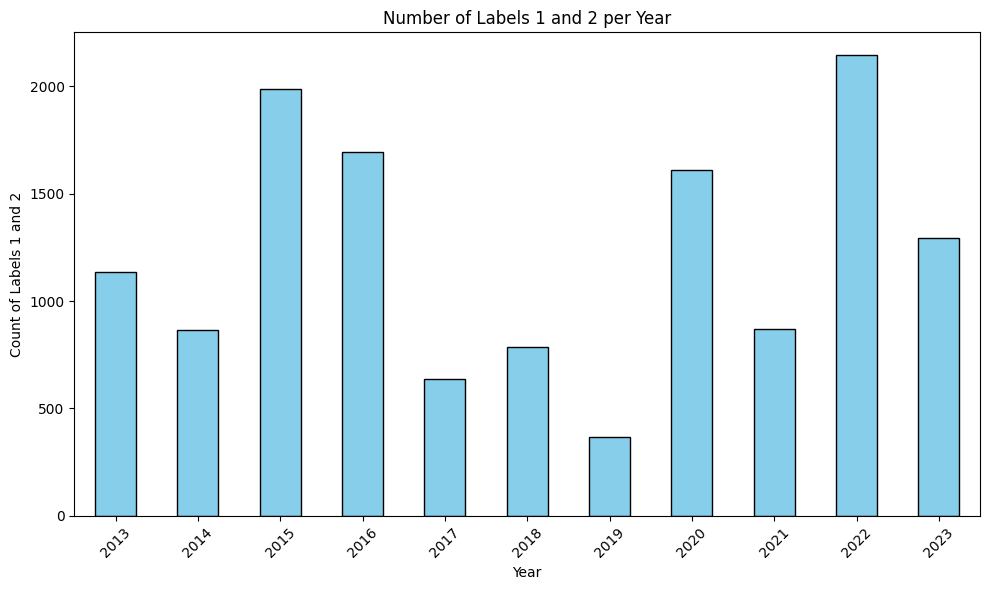

In [35]:
# Plot
plot_label_counts_per_year(df_aud)

## M60 USD/CAD

In [ ]:
# Load the data
df_cad = pd.read_csv('M60 FX Data/M60_usd_cad_combined.csv', parse_dates=['Date'])

# Sort by Date in ascending order
df_cad.sort_values('Date', inplace=True)
df_cad.reset_index(drop=True, inplace=True)

# Calculate the absolute maximum move
df_cad['max_move'] = calculate_abs_max_move(df_cad)


# Display the updated DataFrame
df_cad.head(20)

,Date,Open,High,Low,Close,Volume,max_move
0,2013-01-01 17:00:00,0.99315,0.99315,0.99214,0.99265,0,-0.771672
1,2013-01-01 18:00:00,0.99291,0.99427,0.99284,0.99394,0,-0.940701
2,2013-01-01 19:00:00,0.99396,0.99399,0.99259,0.99259,0,-0.805972
3,2013-01-01 20:00:00,0.99267,0.99275,0.98844,0.98858,0,-0.413725
4,2013-01-01 21:00:00,0.98859,0.98859,0.98554,0.98560,0,0.204951
5,2013-01-01 22:00:00,0.98558,0.98652,0.98550,0.98641,0,-0.290954
6,2013-01-01 23:00:00,0.98639,0.98788,0.98639,0.98759,0,-0.410089
7,2013-01-02 00:00:00,0.98760,0.98775,0.98697,0.98731,0,-0.381846
8,2013-01-02 01:00:00,0.98730,0.98798,0.98623,0.98762,0,-0.413114
9,2013-01-02 02:00:00,0.98763,0.98802,0.98634,0.98707,0,-0.357624


In [37]:
# Exclude NaN values to ensure accurate percentile calculation
max_move_values = df_cad['max_move'].dropna()

# Using NumPy
percentile_10 = np.percentile(max_move_values, 10)
percentile_90 = np.percentile(max_move_values, 90)

print(f"10th Percentile: {percentile_10:.3f}%")
print(f"90th Percentile: {percentile_90:.3f}%")

10th Percentile: -0.440%
90th Percentile: 0.457%


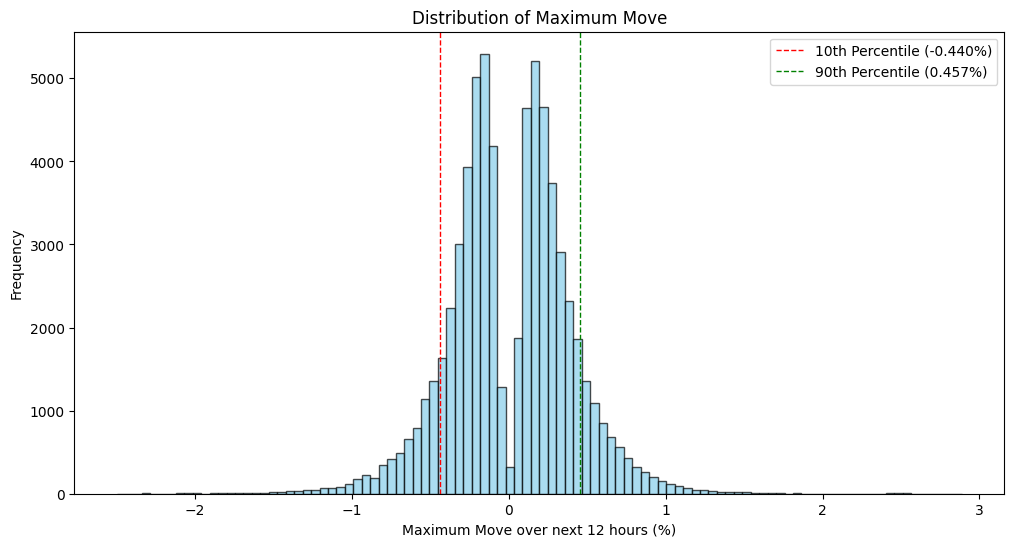

In [38]:
# Create a histogram of cum_max_move
plt.figure(figsize=(12, 6))
plt.hist(max_move_values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the 10th and 90th percentiles
plt.axvline(percentile_10, color='red', linestyle='dashed', linewidth=1, label=f'10th Percentile ({percentile_10:.3f}%)')
plt.axvline(percentile_90, color='green', linestyle='dashed', linewidth=1, label=f'90th Percentile ({percentile_90:.3f}%)')

# Add labels and title
plt.xlabel('Maximum Move over next 12 hours (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Move')

# Add a legend
plt.legend()

# Show the plot
plt.show()

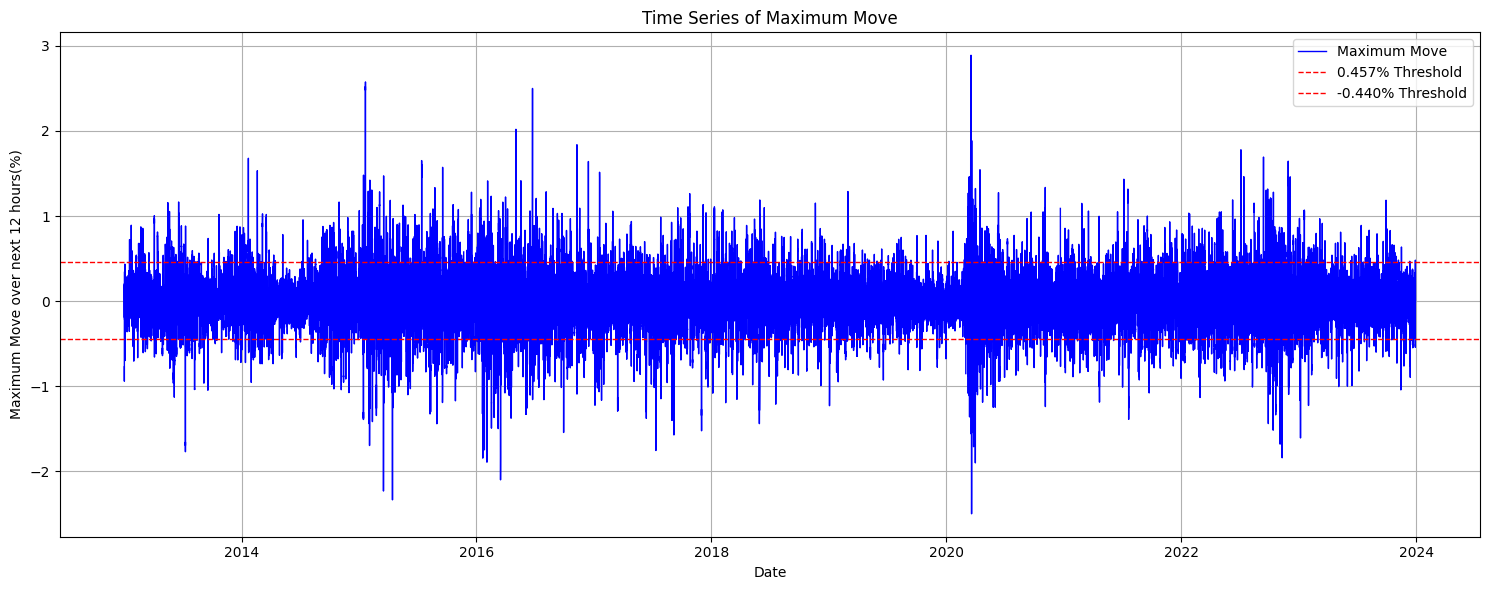

In [ ]:
# Ensure 'Date' is in datetime format and sorted
df_cad['Date'] = pd.to_datetime(df_cad['Date'])
df_cad.sort_values('Date', inplace=True)

# Set 'Date' as the DataFrame index for easier plotting
df_cad.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the 'abs_max_move' time series
plt.plot(df_cad.index, df_cad['max_move'], color='blue', linewidth=1, label='Maximum Move')

# Add horizontal red dashed lines at y = 0.463% and y = -0.472%
plt.axhline(y=0.457, color='red', linestyle='--', linewidth=1, label='0.457% Threshold')
plt.axhline(y=-0.440, color='red', linestyle='--', linewidth=1, label='-0.440% Threshold')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Maximum Move over next 12 hours(%)')
plt.title('Time Series of Maximum Move')
plt.grid(True)
plt.legend()  # Add a legend to differentiate between the lines
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
# Define the conditions
conditions = [
    df_cad['max_move'] > 0.457,   # Condition for Label 1
    df_cad['max_move'] < -0.440   # Condition for Label 2
]

# Define the corresponding labels
labels = [1, 2]

# Create the 'Label' column using np.select
df_cad['Label'] = np.select(conditions, labels, default=0)

# Display the first few rows to verify
df_cad.head()

,Open,High,Low,Close,Volume,max_move,Label
Date,,,,,,,
2013-01-01 17:00:00,0.99315,0.99315,0.99214,0.99265,0,-0.771672,2
2013-01-01 18:00:00,0.99291,0.99427,0.99284,0.99394,0,-0.940701,2
2013-01-01 19:00:00,0.99396,0.99399,0.99259,0.99259,0,-0.805972,2
2013-01-01 20:00:00,0.99267,0.99275,0.98844,0.98858,0,-0.413725,0
2013-01-01 21:00:00,0.98859,0.98859,0.98554,0.98560,0,0.204951,0


In [66]:
# Saving the data frame
df_cad.to_csv('M60_usd_cad_avg12H_labeled.csv', index=True)

In [41]:
def plot_label_counts_per_year(df_cad):
    """
    Counts the number of labels 1 and 2 combined for each year in the df_cad DataFrame
    and plots the counts as a bar chart.

    Parameters:
    df_cad (pd.DataFrame): DataFrame with a DateTime index and a 'label' column containing 0, 1, or 2.

    Returns:
    None
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df_cad.index, pd.DatetimeIndex):
        try:
            df_cad = df_cad.copy()
            df_cad.index = pd.to_datetime(df_cad.index)
        except Exception as e:
            raise ValueError("The DataFrame index must be convertible to DateTime.") from e

    # Filter rows where label is 1 or 2
    filtered_df = df_cad[df_cad['Label'].isin([1, 2])]

    # Extract the year from the index
    filtered_df = filtered_df.copy()
    filtered_df['year'] = filtered_df.index.year

    # Group by year and count the number of labels 1 and 2
    label_counts = filtered_df.groupby('year')['Label'].count()

    # Sort the counts by year for better visualization
    label_counts = label_counts.sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Number of Labels 1 and 2 per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Labels 1 and 2')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

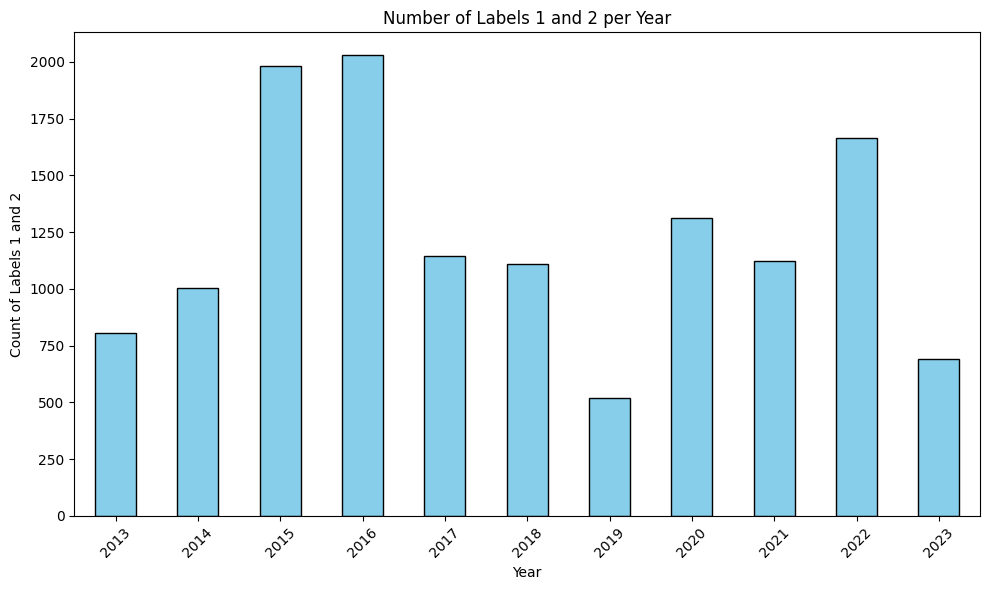

In [42]:
# Plot
plot_label_counts_per_year(df_cad)